# Simulating and studying an AR process

In [1]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [2]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [3]:
model = ar.AutoRegressive(steps=1000, paths=9, a=np.array([0.2, 0.2, 0.1]), start=0, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 233068.79it/s]

9 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


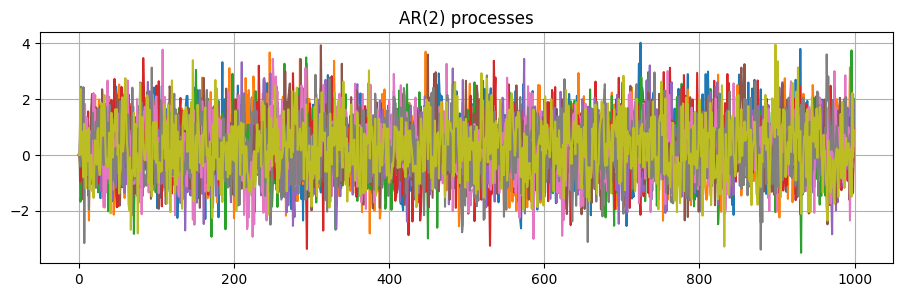

In [4]:
model.plot_paths(data=data)

In [5]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8
0,0.212956,0.163971,0.150246,0.205923,0.200480,0.242385,0.183579,0.129889,0.197609
1,0.199231,0.184834,0.217382,0.169600,0.146074,0.190185,0.233328,0.222325,0.210186
2,0.122139,0.069087,0.054388,0.110988,0.078381,0.076016,0.107387,0.087035,0.077054


In [6]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients'})

,Average estimated coefficients,Real coefficients
0,0.187449,0.2
1,0.197016,0.2
2,0.086942,0.1


100%|██████████| 998/998 [00:00<00:00, 120882.39it/s]



RESIDUALS DIAGNISTIC




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000465,0.000056,-0.000597,0.000025,-0.000544,0.000350,-0.000280,-0.000955,-0.000129
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-2.832283,-2.925774,-3.681848,-3.569444,-3.033112,-2.816098,-3.172546,-3.360256,-3.379958
25%,-0.676271,-0.680120,-0.660646,-0.656593,-0.645085,-0.648993,-0.640364,-0.710769,-0.685978
50%,-0.016245,-0.000765,0.025361,-0.022380,-0.007272,-0.046208,0.016680,-0.006157,0.000921
75%,0.667729,0.651639,0.657878,0.656809,0.711025,0.668651,0.629692,0.724596,0.666729
max,3.563024,3.357517,3.513103,3.111862,3.116951,3.598146,3.374624,3.205532,3.490163




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8
mean,-0.000465,0.000056,-0.000597,0.000025,-0.000544,0.000350,-0.000280,-0.000955,-0.000129
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,0.143912,0.129405,-0.053249,0.061261,-0.026583,0.067763,-0.058429,0.011127,0.000075
kurtosis,3.019974,3.116032,3.255746,3.241699,2.969804,3.087345,3.241862,2.813375,2.911732




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8
jb stat,3.468422,3.351909,3.197822,3.059586,0.155771,1.083185,3.006363,1.471832,0.324634
p value,0.176539,0.187129,0.202116,0.216580,0.925070,0.581821,0.222421,0.479066,0.850172




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.152955,0.084779,0.068853,0.133351,0.091993,0.093717,0.140477,0.111509,0.098216
2,0.218270,0.190843,0.219819,0.183499,0.153303,0.197285,0.248638,0.231318,0.218102
3,0.071366,0.032642,0.049480,0.024985,0.040969,0.035059,0.117097,0.068702,0.072735
4,-0.007880,0.064165,0.088873,0.010892,0.028594,0.058324,0.125922,0.043443,0.005240
5,0.038037,-0.013183,0.056848,-0.052414,0.027161,0.011423,0.060017,0.010894,0.031127
6,0.018021,0.064369,0.045642,-0.047869,0.001178,0.026954,0.065485,-0.043449,-0.026138
7,0.021962,-0.012534,0.028869,-0.073829,0.027968,0.002202,-0.000402,-0.038653,0.019048
8,0.062148,0.013173,0.008884,0.045364,0.052494,0.002935,0.027180,0.025763,0.048726
9,-0.015226,-0.018855,-0.007593,-0.036315,0.080002,0.010691,0.087931,-0.014858,0.025703


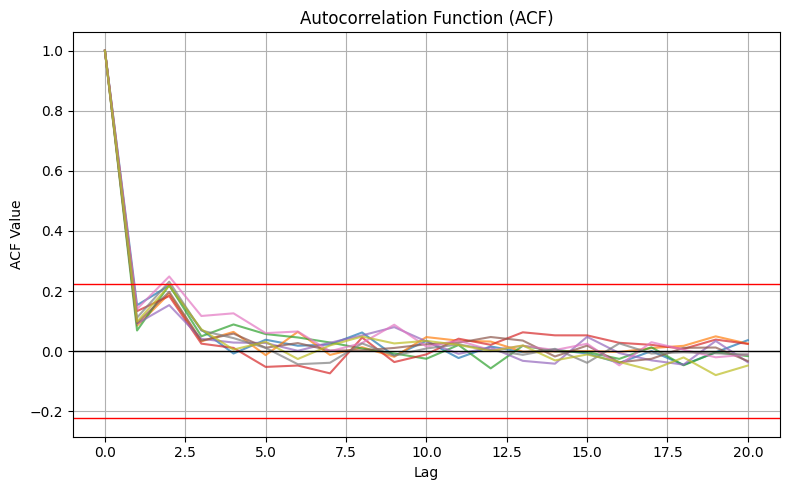



QQ Plots


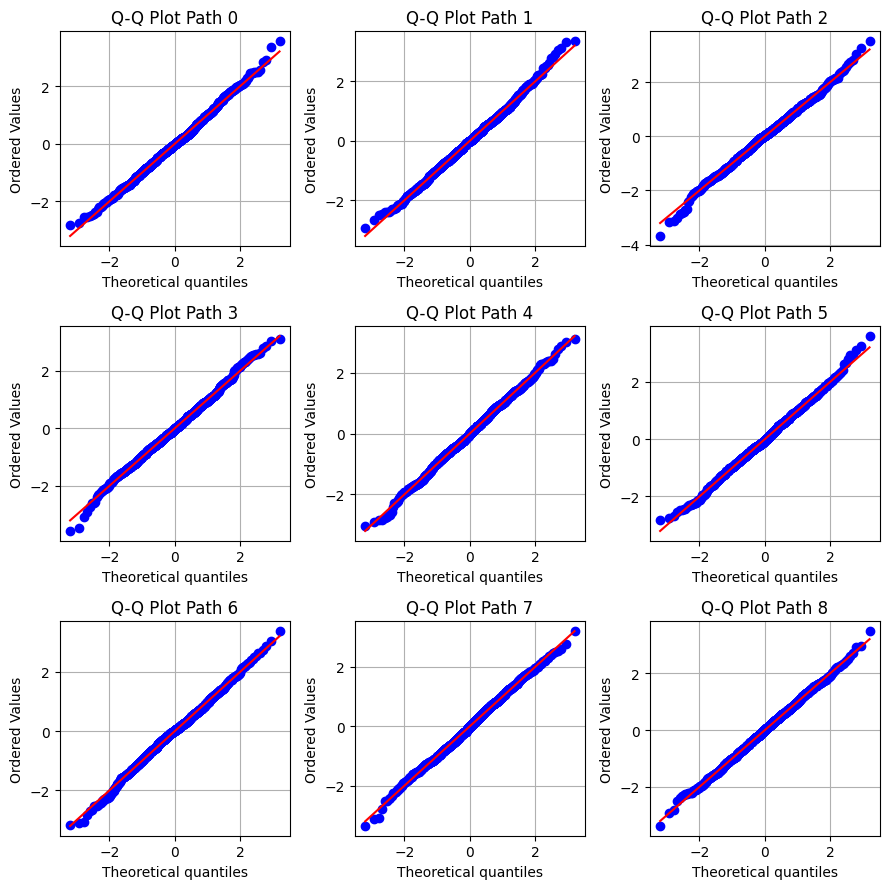

In [7]:
eps, eta = model.get_residuals()
model.study_residuals()